# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in machine learning. 
It is used to reduce the number of features in a dataset by projecting the data onto a lower-dimensional space. 

PCA achieves this by finding the principal components of the data, which are the directions along which the data varies the most. 

### Idea

At its core, PCA revolves around the concept of finding a new set of dimensions — called principal components — that capture the maximum variance in the data. The main goal of PCA is dimensionality reduction, which it achieves by transforming the original dataset into a set of linearly uncorrelated variables (principal components). The first principal component captures the maximum variance possible along a single axis, the second principal component captures the maximum remaining variance in a perpendicular direction to the first, and so on.

### Intuition

Imagine spreading a cloud of data points across multiple dimensions (features). Visualize these data points as existing within an n-dimensional space. PCA seeks to rotate and project these data points onto a new coordinate system (a set of axes) where the greatest variance by any projection of the data lies on the first axis (principal component), the second greatest variance on the second axis, and so forth. This results in a set of orthogonal vectors (loading vectors) that aid in descriptive and predictive modeling.

### Vector Projection

Vector Projection is a linear algebra concept that is used in PCA. It is used to project a vector onto another vector. The projection of a vector `a` onto a vector `b` is given by the formula:

$$\text{proj}_b(a) = \frac{a \cdot b}{||b||^2} \cdot b$$

where `a` is the vector to be projected and `b` is the vector onto which `a` is to be projected.

<img src="./art/vector_projection.jpg" width="40%" />

**Derivation**

Unit vector in direction of $b$ is given by:

$\hat{b} = \frac{b}{||b||}$

So projection of $a$ onto $b$, $p$ is given by:

$p = k \cdot \hat{b}$

where $k$ is the scalar projection of $a$ onto $b$. 

Now $p + c = a$ based on the triangle formed by $a$, $p$ and $c$. 

$p + c = a \rightarrow c = a - p$

Now since $c$ and $p$ are orthogonal, their dot product is zero:

$c \cdot p = 0$

Substituting $c = a - p$: and $p = k \cdot \hat{b}$:

$(a - k \cdot \hat{b}) \cdot (k \cdot \hat{b}) = 0$

$a \cdot (k \cdot \hat{b}) - k \cdot \hat{b} \cdot (k \cdot \hat{b}) = 0$

$k (a \cdot \hat{b}) - k^2 (\hat{b} \cdot \hat{b}) = 0$

Since $\hat{b} \cdot \hat{b} = 1$ as is a unit vector:

$k (a \cdot \hat{b}) - k^2 = 0$

$a \cdot \hat{b} - k = 0$

$k = a \cdot \hat{b}$

From this we have:

$p = k \hat{b} = (a \cdot \hat{b}) \hat{b} = \frac{a \cdot b}{||b||} \cdot \frac{b}{||b||} = \frac{a \cdot b}{||b||^2} \cdot b$

**Implementation:**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def vector_projection(data, vec):
    """
    Returns the projection of data onto vec

    Parameters
    ----------
    data : np.ndarray (n, d)
        The data to project
    vec : np.ndarray (d,)
    """

    dir = vec / np.linalg.norm(vec) # b / ||b||
    # np.dot(data, dir) is same as np.sum(data * dir, axis=1), dimension (n,)
    projections = np.dot(data, dir)[:, None] * dir
    return projections

### Example of Principal Component

Let's consider a simple example to understand the concept of PCA. 

A good PCA is a vector along the direction of maximum variance. In this case it captures the most variance/information in the data.
A bad PCA is a vector along the direction of minimum variance. In this case it captures the least variance/information in the data.

Below there are components, one good and one bad. The good component captures the most variance in the data and the bad component captures the least variance in the data.

In [22]:
def scattered_dataset(n_samples=100):
    np.random.seed(1337)
    X1 = np.random.randn(n_samples)
    noise = np.random.normal(scale=1, size=n_samples)
    X2 = 2 * X1 + noise
    X = np.column_stack((X1, X2))
    return X

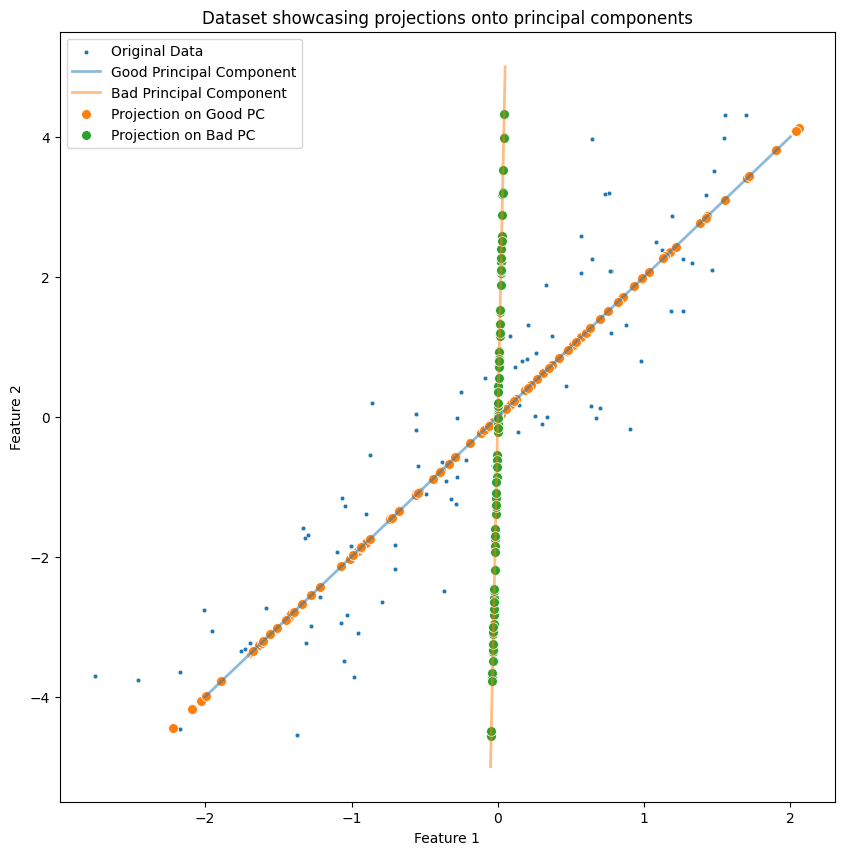

In [23]:
# Generate random data
np.random.seed(1337)
X = scattered_dataset()

# Define principal components
# s=(slope, intercept)
pc_1 = (2, 0)
pc_2 = (100, 0)

pc_1_xs = np.array([-2, 2])
pc_1_ys = pc_1_xs * pc_1[0] + pc_1[1]
pc_1_pts = np.column_stack((pc_1_xs, pc_1_ys))

pc_2_xs = np.array([-.05, .05])
pc_2_ys = pc_2_xs * pc_2[0] + pc_2[1]
pc_2_pts = np.column_stack((pc_2_xs, pc_2_ys))


X_PC_1 = vector_projection(X, pc_1_pts[0])
X_PC_2 = vector_projection(X, pc_2_pts[0])

plt.figure(figsize=(10, 10))

# Plot points
sns.scatterplot(x=X[:, 0], y=X[:, 1], label='Original Data', s=10)

# Plot the principal components
sns.lineplot(x=pc_1_pts[:, 0], y=pc_1_pts[:, 1], linewidth=2, label='Good Principal Component', alpha=0.5)
sns.lineplot(x=pc_2_pts[:, 0], y=pc_2_pts[:, 1], linewidth=2, label='Bad Principal Component', alpha=0.5)

# Plot the projections
sns.scatterplot( x=X_PC_1[:, 0], y=X_PC_1[:, 1], label='Projection on Good PC', s=50)
sns.scatterplot( x=X_PC_2[:, 0], y=X_PC_2[:, 1], label='Projection on Bad PC', s=50)

plt.title('Dataset showcasing projections onto principal components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In this naive example, we have a dataset with two features, x and y. The principal component is the line along which the data has the maximum variance.

After this line is found, the data is projected onto it, and the new dataset is created. This new dataset has only one feature, which is the principal component.

If we choose a PCA which does not have the maximum variance, the new dataset will have a lower variance than the original dataset and will be less informative.

### Algorithm

PCA is mathematically grounded in linear algebra and involves eigenvector and eigenvalue computation. Here's how the PCA algorithm can be broken down into detailed steps:

1. **Standardize the Dataset**:
   Ensure the data is centered around the mean and scaled appropriately such that each feature contributes equally.
   
   For a dataset $X$ with $m$ samples and $n$ features, the standardized data $Z$ is calculated as:
   
   $ Z = \frac{X - \mu}{\sigma} $
   
   where $\mu$ is the mean of the dataset and $\sigma$ is the standard deviation.

2. **Compute the Covariance Matrix**:
   The covariance matrix represents how each feature of the data relates to every other feature.
   
   $ \Sigma = \frac{1}{m} Z^T Z $
   
   Here, $\Sigma$ is the $n \times n$ covariance matrix.

3. **Calculate Eigenvectors and Eigenvalues**:
   Identify the directions of maximum variance by computing the eigenvectors and eigenvalues of the covariance matrix.
   
   $ \Sigma v_i = \lambda_i v_i $
   
   Where $v_i$ are the eigenvectors and $\lambda_i$ are the corresponding eigenvalues.

4. **Sort Eigenvectors by Eigenvalues**:
   Order the eigenvectors by their corresponding eigenvalues in descending order. This ranking reflects the components that account for the most variance.

5. **Select Principal Components**:
   Choose the top $k$ eigenvectors based on the largest eigenvalues to form a matrix of principal components.
   
   $ W = [v_1, v_2, \ldots, v_k] $

6. **Transform the Original Dataset**:
   Project the original standardized data onto the new lower-dimensional space, defined by the chosen eigenvectors.
   
   $ Z_{\text{new}} = Z W $



### Covariance Matrix

The covariance matrix is a square matrix that computes the covariance between each pair of features in the dataset. It is a measure of how much two variables change together. In our case the covariance matrix would have a row for each feature and a column for each feature. The element at the $i^{th}$ row and $j^{th}$ column would be the covariance between the $i^{th}$ and $j^{th}$ features. A covariance matrix is always symmetric (ie $X^T = X$) and positive semi-definite. Positive semi-definite means that all the eigenvalues of the matrix are non-negative. The diagonal elements of the covariance matrix are the variances of the features.

The covariance between two features $x$ and $y$ is calculated as:

$$ \text{cov}(x, y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1} $$

where $\bar{x}$ and $\bar{y}$ are the means of $x$ and $y$ respectively. Note here we divide by $n-1$ instead of $n$ to make the covariance matrix unbiased because we are estimating the population covariance from a sample and not the entire population.

**Example:**

In [4]:
import numpy as np

# Generate a random population
np.random.seed(1337)
population = np.random.normal(loc=50, scale=10, size=10000)  # Population with mean=50, std=10

# Step 2: Compute the population variance
population_variance = np.var(population)  # True variance (divided by N)

# Step 3: Sampling and variance estimation
sample_size = 30  # Size of each sample
num_samples = 1000  # Number of samples
biased_variances = []
unbiased_variances = []

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    biased_variances.append(np.var(sample))  # Divide by n (biased)
    # ddof means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number
    unbiased_variances.append(np.var(sample, ddof=1))  # Divide by n-1 (unbiased)

# Step 4: Compare the results
mean_biased_variance = np.mean(biased_variances)
mean_unbiased_variance = np.mean(unbiased_variances)

print("True Population Variance:", population_variance)
print("Mean of Biased Sample Variances (divided by n):", mean_biased_variance)
print("Mean of Unbiased Sample Variances (divided by n-1):", mean_unbiased_variance)
print("%% diff between true variance and biased sample variance: %.2f %%" % ((population_variance - mean_biased_variance) / population_variance * 100))
print("%% diff between true variance and unbiased sample variance: %.2f %%" % ((population_variance - mean_unbiased_variance) / population_variance * 100))


True Population Variance: 99.01058780208135
Mean of Biased Sample Variances (divided by n): 95.50242360988217
Mean of Unbiased Sample Variances (divided by n-1): 98.79561063091259
% diff between true variance and biased sample variance: 3.54 %
% diff between true variance and unbiased sample variance: 0.22 %


As you can see, the biased form underestimates the covariance of the dataset sample. The unbiased form is used in practice to estimate the covariance of the population from a sample.

Expanding the $ (x_i - \bar{x})(y_i - \bar{y}) $ term, we get:

$$ \text{cov}(x, y) = \frac{\sum_{i=1}^{n} x_i y_i - x_i \bar{y} - y_i \bar{x} + \bar{x} \bar{y}}{n-1} $$

$$ \text{cov}(x, y) = \frac{1}{n-1} \left( \sum_{i=1}^{n} x_i y_i - \bar{y} \sum_{i=1}^{n} x_i - \bar{x} \sum_{i=1}^{n} y_i + n \bar{x} \bar{y} \right) $$

Since $ \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $ and $ \bar{y} = \frac{\sum_{i=1}^{n} y_i}{n} $ and $ \bar{x \cdot y} = \frac{\sum_{i=1}^{n} x_i y_i}{n} $
, we can rewrite the equation as:

$$ \text{cov}(x, y) = \frac{1}{n-1} \left( n \bar{x \cdot y} - \bar{y} n \bar{x} - \bar{x} n \bar{y} + n \bar{x} \bar{y} \right) $$

$$ \text{cov}(x, y) = \bar{x \cdot y} - \bar{x} \cdot \bar{y} $$

This can be written in matrix form as:

$$ \Sigma = \frac{1}{n-1} Z^T Z $$

where $Z$ is $ X - \mu $ and $\mu$ is the mean of the dataset.

**Implementation:**

In [ ]:
def covar(X):
    """
    Returns the covariance matrix of X

    Parameters
    ----------
    X : np.ndarray (n, d)
        The data matrix
    """

    n = X.shape[0]
    X = X - X.mean(axis=0)  # Center the data
    return X.T @ X / (n - 1)

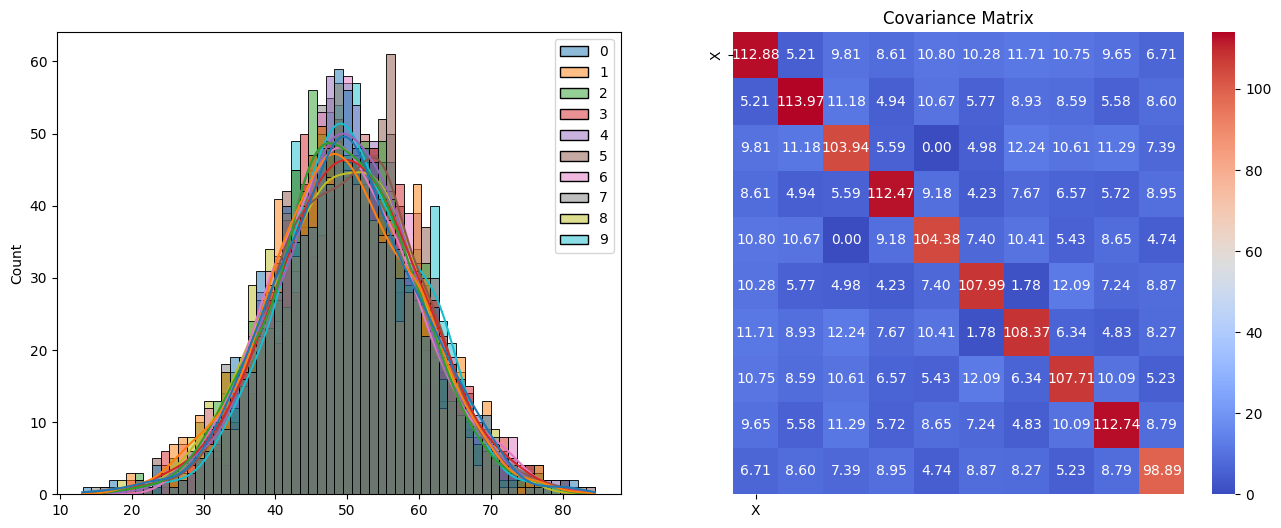

In [21]:
data = np.random.normal(loc=50, scale=10, size=(1000, 10))

X = np.c_[data]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.flatten()

sns.histplot(X, kde=True, ax=ax[0])
plt.title('Histogram of the population')
plt.xlabel('Value')
plt.ylabel('Frequency')

X_centered = X - np.mean(X)
Cov = covar(X_centered)

# Base at 0 for better plotting
Cov = Cov - np.min(Cov)

sns.heatmap(Cov, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=['X'], yticklabels=['X'], ax=ax[1])
plt.title('Covariance Matrix')
plt.show()

### Eigen Decomposition

Eigen decomposition is a process by which a square matrix is decomposed into a set of eigenvectors and eigenvalues. The eigenvectors are the directions along which the data varies the most, and the eigenvalues are the magnitudes of the variance in these directions. Eigen vectors are unit vectors, which means their magnitude is 1 and they are orthogonal to each other. So a matrix of size $n \times n$ will have $n$ eigen vectors and $n$ eigen values, the maximum number of eigen vectors is equal to the number of features in the dataset.

The eigen decomposition of a matrix $A$ is given by:

$$ A v = \lambda v $$

where $v$ is the eigenvector and $\lambda$ is the eigenvalue and $A$ is the matrix to be decomposed.

$ A v = \lambda v $

$ A v - \lambda I v = 0 $, where $I$ is the identity matrix.

$ (A - \lambda I) v = 0 $

Since we know that $v$ is not zero, the matrix $A - \lambda I$ must have a solution in its null-space which is a non-zero vector $v$. This means the matrix $A - \lambda I$ is non-invertible, and as a property of non-invertible matrices, the determinant of the matrix is zero.

$ \text{det}(A - \lambda I) = 0 $

using the determinant, we can form equations to solve for possible values of $\lambda$. It will be a polynomial of degree $n$ where $n$ is the size of the matrix.

Once we have the eigenvalues, we can substitute them back into the equation $ A v = \lambda v $ to get the eigenvectors.

**Deriving Eigenvalues and Eigenvectors**

Deriving the eigenvalues and eigenvectors is not a trivial task and involves solving a polynomial equation of n-th degree. The general form of the equation is:


#### Power iteration method

The simplest method of finding the eigenvalues is to use the **Power iteration method**. The power iteration method is an iterative method that finds the eigenvector corresponding to the largest eigenvalue of a matrix. The method is based on the fact that if you multiply a vector by a matrix repeatedly, it will converge to the eigenvector corresponding to the largest eigenvalue.

**Derivation**

Consider a matrix $ A $ with eigenvalues $ \lambda_1, \lambda_2, \dots, \lambda_n $ such that $ |\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq \cdots \geq |\lambda_n| $. Let the corresponding eigenvectors be $ v_1, v_2, \dots, v_n $.

If the initial random vector $ b^{(0)} $ can be expressed as a linear combination of the eigenvectors:

$ b^{(0)} = c_1 v_1 + c_2 v_2 + \cdots + c_n v_n $

Then applying the matrix $ A $ repeatedly to $ b^{(0)} $ gives:

$ b^{(1)} = A \cdot b^{(0)} $
$ = A \cdot (c_1 v_1 + c_2 v_2 + \cdots + c_n v_n) $
$ = c_1 A v_1 + c_2 A v_2 + \cdots + c_n A v_n $

Now since $ v_i $ are eigenvectors of $ A $, $ A v_i = \lambda_i v_i $. We now have

$ b^{(1)} = c_1 \lambda_1 v_1 + c_2 \lambda_2 v_2 + \cdots + c_n \lambda_n v_n $

Similarly

$ b^{(2)} = A \cdot b^{(1)} $

$ = A \cdot (c_1 \lambda_1 v_1 + c_2 \lambda_2 v_2 + \cdots + c_n \lambda_n v_n) $

$ = c_1 \lambda_1 A v_1 + c_2 \lambda_2 A v_2 + \cdots + c_n \lambda_n A v_n $

$ = c_1 \lambda_1^2 v_1 + c_2 \lambda_2^2 v_2 + \cdots + c_n \lambda_n^2 v_n $


Generalizing,

$ b^{(k)} = c_1 \lambda_1^k v_1 + c_2 \lambda_2^k v_2 + \cdots + c_n \lambda_n^k v_n $

**Normalization**

To prevent numerical overflow and improve convergence stability, the vector is typically normalized at each iteration:
$$ b^{(k+1)} = \frac{A b^{(k)}}{\|A b^{(k)}\|} $$


**Eigenvalue**

As $ k $ increases, $ \lambda_1^k $ will dominate the expression because $ |\lambda_1| > |\lambda_i| $ for all $ i \geq 2 $. If $ c_1 \neq 0 $, the vector $ b^{(k)} $ will become approximately proportional to $ \lambda_1^k v_1 $. Normalizing $ b^{(k)} $ helps in isolating the direction aspect, bringing it closer to $ v_1 $.

Next, we calculate the eigenvalue $ \lambda_1 $ using the Rayleigh quotient:

$ A v = \lambda v $

$ v^T A v = v^T \lambda v $

$ v^T A v = \lambda v^T v $

Now since both sides are scaler values, we can write:

$ \lambda = \frac{v^T A v}{v^T v} \approx \frac{b^{(k)T} A b^{(k)}}{b^{(k)T} b^{(k)}} $

This is the Rayleigh quotient, which is used to approximate the eigenvalue $ \lambda_1 $.

**Implementation:**

In [ ]:
def power_iteration(A, max_iter=1000, tol=1e-6):
    assert A.ndim == 2, 'Input matrix must be 2D'
    n, m = A.shape
    assert n == m, 'Input matrix must be square'

    # Step 1: Generate a random vector of size n
    b = np.random.rand(n)

    # Step 2: Iterate until convergence
    for _ in range(max_iter):
        # Step 3: Compute the matrix-by-vector product Ab
        b_new = np.dot(A, b)
        # Step 4: Compute the norm
        b_new = b_new / np.linalg.norm(b_new)  # Normalize the vector

        # Step 5: Check for convergence
        if np.linalg.norm(b - b_new) < tol:
            break

        # Step 6: Update the vector
        b = b_new

    # b is now the first eigenvector

    # Step 5: Compute the eigenvalue using Rayleigh quotient
    eig_val = np.dot(b, np.dot(A, b)) / np.dot(b, b)

    return eig_val, b

First Principal Component: [0.39831332 0.91724942] 5.622396299668944


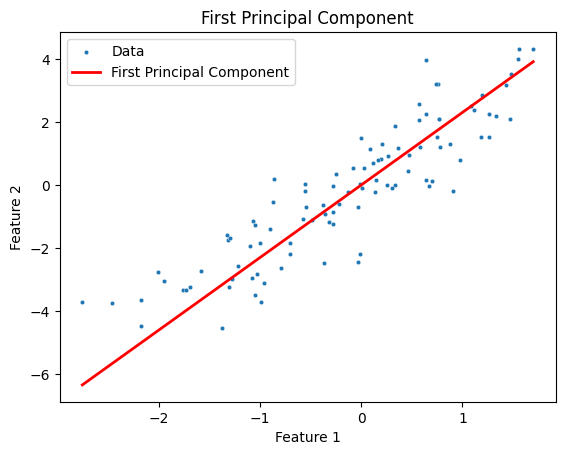

In [27]:
X = scattered_dataset()
Cov = covar(X)
eig_val, eig_vec = power_iteration(Cov)

eig_slope = eig_vec[1] / eig_vec[0]

min_x = np.min(X[:, 0])
max_x = np.max(X[:, 0])

min_y = eig_slope * min_x
max_y = eig_slope * max_x

print("First Principal Component:", eig_vec, eig_val)

sns.scatterplot(x=X[:, 0], y=X[:, 1], label='Data', s=10)
plt.plot([min_x, max_x], [min_y, max_y], label='First Principal Component', linewidth=2, color='red')
plt.title('First Principal Component')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Datasets

### SKlearn

### Implementation


### Conclusion

### PCA vs t-SNE

PCA and t-SNE are both dimensionality reduction techniques, but they serve different purposes. 

**PCA (Principal Component Analysis)**

- **Linear Dimensionality Reduction**: PCA is a linear technique that transforms the data into a lower-dimensional space by finding directions (principal components) that maximize variance.
- **Large Data Handling**: PCA can handle large datasets efficiently, especially when using techniques like Singular Value Decomposition (SVD).
- **Interpretability**: The principal components in PCA are linear combinations of the original features and are therefore easy to interpret.
- **Computational Speed**: Typically faster to compute than t-SNE, especially for large datasets.
- **Global Structure Preservation**: Captures the global variance in the data, representing the overall data structure.
- **Output**: Produces an exact transformation and is deterministic, meaning the same input will always result in the same output.

**t-SNE (t-Distributed Stochastic Neighbor Embedding)**

- **Non-linear Dimensionality Reduction**: t-SNE is a non-linear technique, effective for visualizing intricate local structures in high-dimensional data in a lower-dimensional space.
- **Visual Exploration**: Particularly suited for creating a 2D or 3D map of complex high-dimensional data, often revealing clusters or groupings.
- **Local Structure Emphasis**: Focuses on maintaining local neighbor relationships rather than global data structure.
- **Computationally Intensive**: More computationally demanding and slower compared to PCA, especially on large datasets.
- **Non-deterministic Output**: Results can vary with different random initializations unless seeded for consistency.
- **Hyperparameter Sensitivity**: Requires careful tuning of hyperparameters like perplexity for optimal results, and different settings can lead to significantly different visual outcomes.
